# Fill Empty Spaces

In [35]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
mask_path = os.path.abspath(os.path.join(os.getcwd(), '../..', 'Mask'))
sys.path.append(mask_path)

from clean_image import clean_image
from segment_image import segment_image

In [36]:
path = "../../Data/water.jpeg"
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img.shape

(841, 862)

## Utils

In [37]:
def plot_img(img, cmp = True):
    if cmp == False:
        plt.imshow(img)    
    else: 
        plt.imshow(img, cmap = plt.cm.gray)
    plt.axis("off")
    plt.show()

In [38]:
def plot_cv(img, cmp = True):
    cv.imshow('Image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

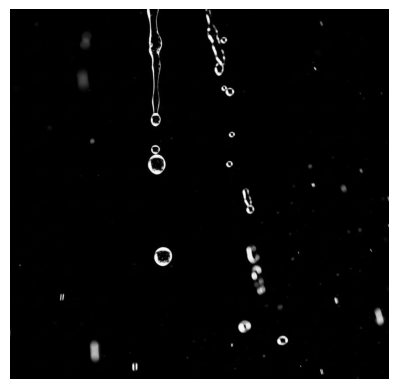

In [39]:
plot_img(img)

In [40]:
plot_cv(img)

## Segment the Image

Height: 841, Width: 862
The area of the image in pixels are: 11046


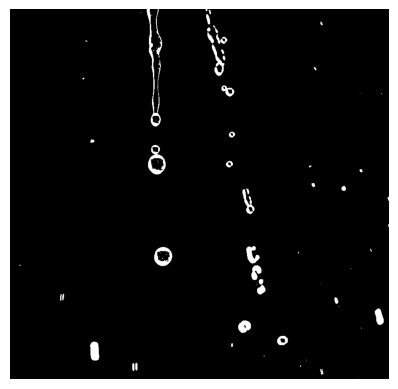

In [41]:
thres = segment_image(img, 70)
plot_img(thres)

In [42]:
plot_cv(thres)

## Applying a Fill

I use the technique to fill the gaps in the x axis. When I find a white pixel, I save the position in `start_dx` and I look forward while the pixels are black (I use a tolerance (`tol`) to determine how many pixels I can see forward). We move using `k`, and if I find another white pixel, that means it's a possible gap. So, I start filling the gap from `start_dx` until this last position `k`.

In [43]:
def fill_gaps(img_thres, fill_value = 255, tol = 12):
    height, width = img_thres.shape
    fill = np.copy(img_thres)     

    for i in range(height):
        for j in range(width):
            if img_thres[i, j] == 255:
                start_dx = j 
                k = j + 1 
                while k < width and img_thres[i, k] == 0:
                    if k - start_dx >= tol:
                        break
                    k += 1

                if k < width and img_thres[i, k] == 255:
                    fill[i, start_dx + 1: k] = fill_value

                j = k
                
    return fill

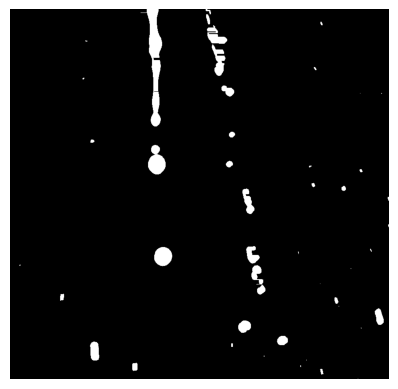

In [44]:
fill = fill_gaps(thres, tol = 32)
plot_img(fill)

In [45]:
plot_cv(fill)